### Student Information
Name: Gustavo Cespedes

Student ID: 106077446

GitHub ID: Tavox47

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [3]:
### Begin Assignment Here!
%load_ext autoreload
%autoreload 2

In [4]:
data_array=[]

with open("amazon_cells_labelled.txt",'r') as amazon_file:
        for sentence in amazon_file.read().split('\n'):
            data_array += [sentence]
with open("imdb_labelled.txt",'r') as imdb_file:
        for sentence in imdb_file.read().split('\n'):
            data_array += [sentence]
with open("yelp_labelled.txt",'r') as yelp_file:
        for sentence in yelp_file.read().split('\n'):
            data_array += [sentence]

In [79]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline
#import helpers.text_analysis as ta

sentence_array=[]
number_array=[]

for sentence in data_array:
    temp_sentence = sentence.split('\t')
    sentence_array += [temp_sentence[0]]
    number_array += [temp_sentence[1]]

dataframe={'sentence':sentence_array,'score':number_array}
dataset= pd.DataFrame(data=dataframe)

print (dataset)

                                               sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
5     I have to jiggle the plug to get it to line up...     0
6     If you have several dozen or several hundred c...     0
7           If you are Razr owner...you must have this!     1
8                   Needless to say, I wasted my money.     0
9                      What a waste of money and time!.     0
10                      And the sound quality is great.     1
11    He was very impressed when going from the orig...     1
12    If the two were seperated by a mere 5+ ft I st...     0
13                             Very good quality though     1
14    The design is very odd, as the ear "clip" is n...     0
15    Hi

In [12]:
#Negative = 0, Positive = 1
categories = ["negative","positive"]

In [17]:
dataset['score'].replace(["0"], 'negative',inplace=True)
dataset['score'].replace(["1"], 'positive',inplace=True)

In [18]:
dataset

,sentence,score
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


In [19]:
dataset[0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


In [21]:
len(dataset)

3000

In [22]:
### TRYING SOME QUERIES

In [26]:
## First 10 only sentence
dataset[0:10][["sentence",]]

,sentence
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.
5,I have to jiggle the plug to get it to line up...
6,If you have several dozen or several hundred c...
7,If you are Razr owner...you must have this!
8,"Needless to say, I wasted my money."
9,What a waste of money and time!.


In [24]:
## Last 10 all info
dataset[-11:-1]

,sentence,score
2989,I would avoid this place if you are staying in...,negative
2990,The refried beans that came with my meal were ...,negative
2991,Spend your money and time some place else.,negative
2992,A lady at the table next to us found a live gr...,negative
2993,the presentation of the food was awful.,negative
2994,I can't tell you how disappointed I was.,negative
2995,I think food should have flavor and texture an...,negative
2996,Appetite instantly gone.,negative
2997,Overall I was not impressed and would not go b...,negative
2998,"The whole experience was underwhelming, and I ...",negative


In [27]:
## 30 lines in intervals of 100
dataset.iloc[::100, :][0:30]

,sentence,score
0,So there is no way for me to plug it in here i...,negative
100,Integrated seamlessly with the Motorola RAZR p...,positive
200,The color is even prettier than I thought it w...,positive
300,Sending it back.,negative
400,what a disappointment,negative
500,"The bose noise cancelling is amazing, which is...",positive
600,Their Research and Development division obviou...,positive
700,"Also, the phone doesn't seem to accept anythin...",negative
800,"Good , works fine.",positive
900,"This was utterly confusing at first, which cau...",negative


In [28]:
## Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [30]:
dataset[dataset['score']=='positive']

,sentence,score
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
4,The mic is great.,positive
7,If you are Razr owner...you must have this!,positive
10,And the sound quality is great.,positive
11,He was very impressed when going from the orig...,positive
13,Very good quality though,positive
15,Highly recommend for any one who has a blue to...,positive
17,So Far So Good!.,positive
18,Works great!.,positive


In [32]:
## Count rows by score
dataset.groupby(['score']).size()

score
negative    1500
positive    1500
dtype: int64

In [33]:
## Name of columns
list(dataset.columns.values)

['sentence', 'score']

In [34]:
dataset.dtypes

sentence    object
score       object
dtype: object

In [39]:
## Missing Values

In [40]:
dataset.isnull()

,sentence,score
2000,False,False
1000,False,False
981,False,False
2190,False,False
381,False,False
39,False,False
764,False,False
2692,False,False
400,False,False
2081,False,False


In [41]:
dataset.isnull().apply(lambda dataset: dmh.check_missing_values(dataset))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [43]:
# Or..
dataset.isnull().sum()

sentence    0
score       0
dtype: int64

In [49]:
# Generate 300 rows of dummy data with missing values in our dataset
dummy_series = pd.Series(["dummy_sentence", "negative"], index=["sentence", "score"])
dummy_series


sentence    dummy_sentence
score             negative
dtype: object

In [51]:
dataset_with_series = dataset.append(dummy_series, ignore_index=True)
len(dataset_with_series)

3001

In [52]:
### Dealing with missing values

In [54]:
# Create a copy of the dataset
dataset_missing = dataset_with_series.copy(deep=True)
dataset_missing["missing_values"] = dataset_missing.isnull().sum(axis=1).tolist()
dataset_missing

,sentence,score,missing_values
0,ï»¿Wow... Loved this place.,positive,0
1,"ï»¿A very, very, very slow-moving, aimless mov...",negative,0
2,you could only take 2 videos at a time and the...,negative,0
3,you can watch them preparing the delicious food!),positive,0
4,you can even take self portraits with the outs...,positive,0
5,worthless product.,negative,0
6,wont work right or atleast for me.,negative,0
7,will definitely be back!,positive,0
8,what a disappointment,negative,0
9,walked in and the place smelled like an old gr...,negative,0


In [58]:
dataset.dropna(inplace=True)
dataset.isnull().sum()


sentence    0
score       0
dtype: int64

In [59]:
len(dataset)

3000

In [60]:
### Dealing with duplicate data

In [61]:
dataset.duplicated()

2000    False
1000    False
981     False
2190    False
381     False
39      False
764     False
2692    False
400     False
2081    False
2259    False
2942    False
514     False
143     False
334     False
199     False
2976    False
2156    False
2158    False
2871    False
1538    False
1530    False
614     False
1305    False
2155    False
2340    False
2993    False
2850    False
241     False
841     False
        ...  
2245    False
2219    False
2026    False
2071    False
1261    False
702     False
2769    False
119     False
1113    False
1699    False
1730    False
1732    False
1389    False
1837    False
1529    False
2359    False
1394    False
857     False
2243    False
1418    False
798     False
811     False
1196    False
1844    False
1019    False
1212    False
1322    False
1347    False
133     False
2610    False
Length: 3000, dtype: bool

In [62]:
sum(dataset.duplicated())

17

In [64]:
#I will try to show duplicates

dataset[dataset.duplicated(keep="first")]

## UPDATE:
## YASSSSSS

,sentence,score
407,Works great.,positive
18,Works great!.,positive
392,This is a great deal.,positive
2816,The food was terrible.,negative
1572,Not recommended.,negative
744,If you like a loud buzzing to override all you...,negative
2846,I would not recommend this place.,negative
2843,I won't be back.,negative
2814,I love this place.,positive
896,Great phone.,positive


In [66]:
## Buuut its time for deleting :( ##

In [68]:
dataset.drop_duplicates(keep="first", inplace=True)

In [69]:
sum(dataset.duplicated())

0

In [70]:
len(dataset) ##They are goooone

2983

In [71]:
### Data Processing

In [73]:
dataset_sample = dataset.sample(n=1000)
len(dataset_sample)

1000

In [82]:
# Again negatives are 0 and positives are 1
categories

['negative', 'positive']

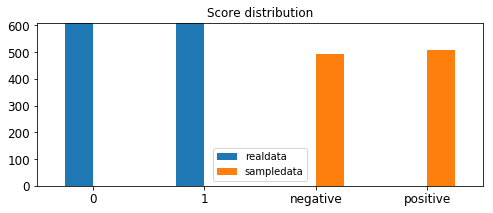

In [84]:

realdataset_count=dataset.score.value_counts()
sampledataset_count=dataset_sample.score.value_counts()

mixed_df={'realdata':realdataset_count,'sampledata':sampledataset_count}
mixed_data_frame= pd.DataFrame(data=mixed_df)

mixed_data_frame.plot(kind = 'bar', title = 'Score distribution', ylim = [0, 610],  rot = 0, fontsize = 12, figsize = (8,3))

In [86]:
len(dataset_sample)


1000

In [87]:
len(dataset)

3000